---
# Zadaća 5
##### Rok za predaju: 7. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: 

---

In [157]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer, scale

## Zadatak 1 (10)
Učitajte podatke `X_train_1.csv` i `y_train_1.csv` i `X_test_1.csv` i `y_test_1.csv`. Podatke trebamo opisati model funkcijom $h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$. <br> Kako bi pronašli odgovarajuće parametre koristite gradijentnu metodu. Zbog većeg broja značajki uvest ćemo regularizaciju. 

- Učitajte i prikažite podatke. Napravite odgovarajuću matricu dizajna. 
- Pokretat ćete gradijentnu metodu s različitim izborima parametra $\lambda$. Odaberite $\lambda = 0,10,20,\cdots, 200$. Za svaki izbor $\lambda$
    - natrenirajte model
    - izračunajte pogrešku na trening skupu
    - izračunajte pogrešku na test skupu
- Nacrtajte graf ovisnosti pogreške regularizacijskom koeficijentu $\lambda$ na trening skupu o i ovisnosti pogreškeo regularizacijskom koeficijentu $\lambda$ na testnom skupu. 
- Što možete zaključiti? Koliki $\lambda$ biste odabrali? Obrazložite. 

In [150]:
def LoadData(pathX,pathY):
    X = pd.read_csv(pathX)
    Y = pd.read_csv(pathY)
    
    X = X.to_numpy()
    Y = Y.to_numpy()
    return X,Y

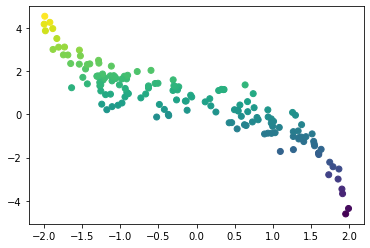

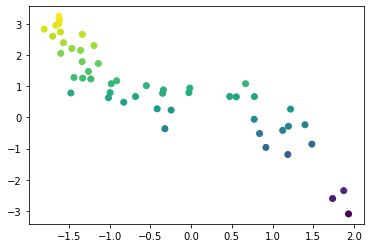

In [190]:
X_train1, y_train1 = LoadData('./X_train_1.csv', './y_train_1.csv')
X_test1, y_test1 = LoadData('./X_test_1.csv', './y_test_1.csv')
X_train1 = X_train1.ravel()
X_test1 = X_test1.ravel()


plt.scatter(X_train1, y_train1, c=y_train1)
plt.show()
plt.scatter(X_test1, y_test1, c=y_test1)
plt.show()

In [191]:
def ModelFunction(theta, X):
    return np.sum(theta*X, axis = 1)

In [197]:
def plotDecisionBoundary(X,y,theta,s):
    # X,y podaci
    # theta parametar
    # stupanj polinoma u model funkciji h_theta(x)
    plt.scatter(X, y)
    xmin = np.min(X)
    xmax = np.max(X)
    xx = np.arange(xmin,xmax,0.1)
    XX = np.ones([xx.shape[0],s+1])
    for i in range(s):
        XX[:,i+1] = xx**(i+1)
    yy = XX.dot(theta)
    plt.plot(xx,yy,'r')
    plt.show()

In [198]:
def h(z):
    return (1.0 / (1.0 + np.exp(-z)))

def predict(X_poly, theta):
    return np.array([1 if i>=0.5 else 0 for i in h(X_poly.dot(theta))])

def Loss(X,y,theta, lam):
    m = X.shape[0]
    xt = X @ theta
    y = y.reshape(-1,1)
    err = xt-y
    hx = h(xt)
    return -(1/m)*np.sum((y*np.log(hx)+(1-y)*np.log(1-hx))) + (lam/(2*m))*theta[1:].T.dot(theta[1:])

def gradientMethodRegularized(X,Y,lam,alpha, numIter): 
    # Argumenti: X - matrica dizajna, Y-vektor izlaza, alpha - stopa ucenja, numIter - broj iteracija
    m = X.shape[0] # broj redataka/podataka
    n = X.shape[1] # broj stupaca/varijabli
    theta =  np.zeros((n,1)) # Kreiramo pocetni theta
    Y = Y.reshape(-1,1)
 
    cost = np.zeros(numIter) 
    for i in range(numIter):
        XThetaY = X.dot(theta)-Y 
        gradJ = (X.T.dot(XThetaY))/m 
        # Prilikom dodavanja regularizirajućeg izraza ne utječemo na nultu komponentu - gradijent je tu isti - theta_0 se ažurira kao prije
        # Nije nužno ovako rastaviti, nego da se naglasi što se događa
        theta[0] = theta[0]- alpha*gradJ[0]
        theta[1:] = theta[1:]*(1-alpha*lam/m) - alpha*gradJ[1:]
        
        cost[i] = ((XThetaY.T).dot(XThetaY) +lam*np.linalg.norm(theta[1:],2)**2)/(2*m) # trosak spremimo
    return theta, cost

In [200]:
X_poly1 = np.ones((X_train1.shape[0],6))
X_poly1[:,1] = X_train1
X_poly1[:,2] = X_train1**2
X_poly1[:,3] = X_train1**3
X_poly1[:,4] = X_train1**4
X_poly1[:,5] = X_train1**5

X_poly2 = np.ones((X_test1.shape[0],6))
X_poly2[:,1] = X_test1
X_poly2[:,2] = X_test1**2
X_poly2[:,3] = X_test1**3
X_poly2[:,4] = X_test1**4
X_poly2[:,5] = X_test1**5

Training greška:  0.2642660392779017
Test greška:  0.3019798505631029


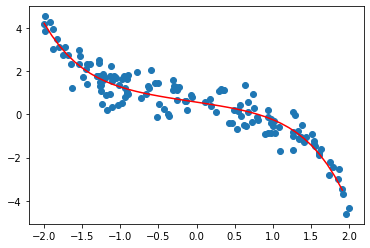

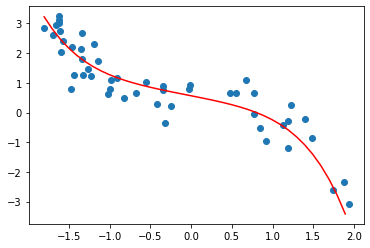

Training greška:  0.34585410148415763
Test greška:  0.3211820197598189


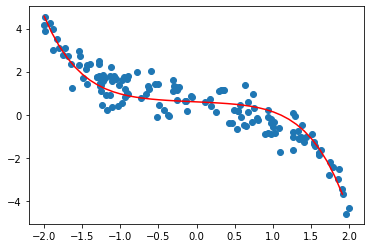

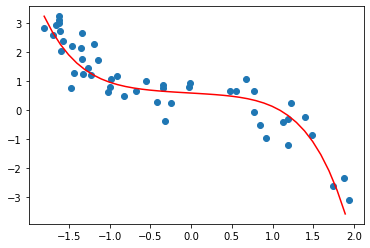

In [207]:
errors_train = []
errors_test = []
theta = []
cost = []

for i in range(0,201,10):
    theta1, cost1 = gradientMethodRegularized(X_poly1, y_train1, i, 0.01, 1500)
    theta.append(theta1)
    cost.append(cost1)
    errors_train.append(mean_squared_error(y_train1, X_poly1.dot(theta1)))
    errors_test.append(mean_squared_error(y_test1, X_poly2.dot(theta1)))
    
print('Training greška: ', mean_squared_error(y_train1, X_poly1.dot(theta[0])))
print('Test greška: ', mean_squared_error(y_test1, X_poly2.dot(theta[0])))
plotDecisionBoundary(X_train1, y_train1, theta[0], 5)
plotDecisionBoundary(X_test1, y_test1, theta[0], 5)
print('Training greška: ', mean_squared_error(y_train1, X_poly1.dot(theta[20])))
print('Test greška: ', mean_squared_error(y_test1, X_poly2.dot(theta[20])))
plotDecisionBoundary(X_train1, y_train1, theta[20], 5)
plotDecisionBoundary(X_test1, y_test1, theta[20], 5)
    
errors_train = np.array(errors_train)
errors_test = np.array(errors_test)
theta = np.array(theta)
cost = np.array(cost)

## Zadatak 2 (10)

Neka je zadan klasifikacijski problem na podacim $X \in \mathbb{R}^{m\times }$ s pripadnim oznakama $y\in \mathbb{R}^m$, gdje je svaki $y_i \in \{ 0,1\}$. <br>
Raspišite kako izgleda regularizirana funkcija $J(\theta)$ za logističku regresiju, njen gradijent te korak ažuriranja. 

---

Učitajte i prikažite podatke `X_train_2` i `y_train_2`. <br>

<br>
Za model funkciju uzimamo polinom $6$-tog stupnja, koristeći sklearn.PolynomialFeatures transformirajte podatke. <br>

Modificirajte gradijentnu metodu (s regularizacijom) tako da iterirate dokle god je razlika u pogreški manja od $10e^{-8}$. Stopu učenja fiksirajte na $0.001$. Natrenirajte vaše podatke s različitim izborom $\lambda = 0, 1, 100$. Za svaki slučaj treniranje 
- nacrajte pripadni graf koji sadrži podatke i granicu, ispišite 
- ispišite točnost (accuracy)
- ispište broj iteracija koji se izvrtio

Što možete zaključiti? 

In [133]:
def h(z):
    return (1.0 / (1.0 + np.exp(-z)))

def predict(X_poly, theta):
    return np.array([1 if i>=0.5 else 0 for i in h(X_poly.dot(theta))])

def Loss(X,y,theta, lam):
    m = X.shape[0]
    xt = X @ theta
    y = y.reshape(-1,1)
    err = xt-y
    hx = h(xt)
    return -(1/m)*np.sum((y*np.log(hx)+(1-y)*np.log(1-hx))) + (lam/(2*m))*theta[1:].T.dot(theta[1:])

def gradientMethodLogRegularized(X,Y,lam,alpha): 
    m = X.shape[0]
    n = X.shape[1]
    theta =  np.zeros((n,1))
    cost = []
    Y = Y.reshape(-1,1)
    #print((1-alpha*(lam/m)))

    numIter = 0
    Iter = True
    while(Iter):        
        XThetaY =  h(X @ theta) -Y
        
        gradJ = (1/m)*((X.T) @ XThetaY)
        theta[0] = theta[0] - alpha*gradJ[0]
        theta[1:] = theta[1:]*(1-alpha*(lam/m)) - alpha*gradJ[1:]
        cost.append(Loss(X,Y,theta,lam))
        if(numIter > 0 and ((cost[numIter-1] - cost[numIter]) < 10e-8)):
            Iter = False
        numIter = numIter + 1
        
    return theta,cost, numIter

In [134]:
def plot_boundary(theta, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),np.arange(y_min, y_max, grid_step))
    
    #Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z=(np.sign(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]).dot(theta))+1)/2
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    X_p = np.array([X[i] for i in range(X.shape[0]) if y[i]==1])
    X_n = np.array([X[i] for i in range(X.shape[0]) if y[i]==0])
    plt.scatter(X_p[:,0],X_p[:,1], marker='o', label='')
    plt.scatter(X_n[:,0],X_n[:,1],marker='x', label='')
    plt.show()

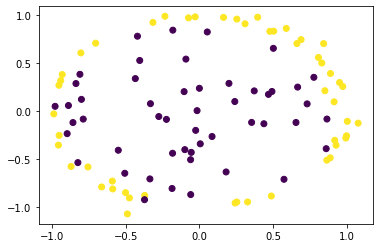

In [135]:
X_train2 = pd.read_csv('./X_train_2.csv').to_numpy()
y_train2 = pd.read_csv('./y_train_2.csv').to_numpy()
y_train2=(LabelBinarizer(neg_label=0)).fit_transform(y_train2)[:,0]

plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train2.reshape(-1,))
plt.show()

In [136]:
poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X_train2)

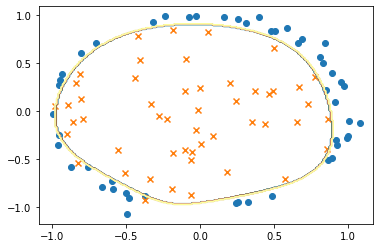

158544


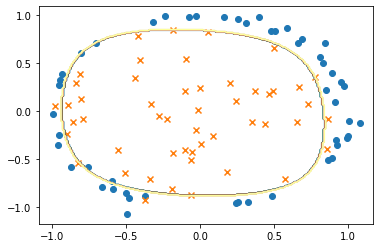

2808


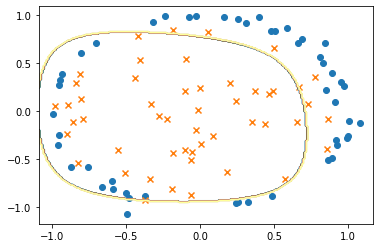

154


In [137]:
lam = 0
theta, cost, numIter = gradientMethodLogRegularized(X_poly,y_train2,lam,0.1)
plot_boundary(theta,X_train2,y_train2, 0.01, poly)
print(numIter)
lam = 1
theta, cost, numIter = gradientMethodLogRegularized(X_poly,y_train2,lam,0.1)
plot_boundary(theta,X_train2,y_train2, 0.01, poly)
print(numIter)
lam = 100
theta, cost, numIter = gradientMethodLogRegularized(X_poly,y_train2,lam,0.1)
plot_boundary(theta,X_train2,y_train2, 0.01, poly)
print(numIter)

## Zadatak 3 (15)
U prošloj zadaći dobili ste skup podataka *mobile_price*. Podaci su sadržavali različite speficikacije mobitela, a zadatak je bio prema tim spefifikacijama svrstati mobitel u neki od cjenovnih rangova. <br>
Sada kada smo se upoznali s pojmom regularizacije, možemo ponoviti taj zadatak, ovaj puta sa regulariziranom softmax regresijom. <br>

1. Modificirajte implementaciju gradijetne metode s obzirom na dodani regularizacijski izraz.
2. Provedite postupak učenja modela na podacima. 
3. Testirajte model tako da ispišete neke od metrika poput točnosti.
4. Ispišite naučene parametre $\theta$ i usporedite ih sa parametrima koje ste dobili u prošloj zadaći kada niste koristili regularizaciju. Koja je razlika?

In [138]:
class Softmax:
    def __init__(self,k,intercept = True):
        self.k = k
        self.theta = None
        self.cost_iterations = None
        self.intercept = intercept
    
    def h(self, z):
        return np.exp(z)/ np.sum(np.exp(z),axis=1).reshape(-1,1)
    
    def indicator_function(self,y):
        """
        y - vector of targets, shape is (m,1) or (m,), each element takes value from {0,1,...,k-1}
        k - single integer, number of classes
        return matrix shaped (m,k), element on [i,j] position is 1 if ith datasample is jth class, and 0 otherwise
        """
        y = y.reshape(-1,1)
        all_classes = np.arange(0,self.k)
        return ((y[:]==all_classes)*1).reshape(-1,self.k)
    
    def cost_function(self,X,y, lam):
        m = X.shape[0]
        thetaX = X.dot(self.theta) # theta^T * X 
        hx = self.h(thetaX) # Primijenjujemo model funkciju h_theta(x) = exp(x)/suma(...)
        I = self.indicator_function(y)
        gradijent= (-1.0)*np.dot(X.T,I-hx)
        #print(gradijent)
        cost = -1.0 * np.sum(np.sum(I*np.log(self.h(thetaX)),axis=1)) + (lam/(2*m))*np.sum(np.sum(self.theta*self.theta,axis=1))
        return cost, gradijent
    
    def plot_cost(self):
        plt.plot(np.arange(self.cost_iterations.shape[0]), self.cost_iterations, color='orchid')
        plt.title('Promjena funkcije pogreške kroz iteracije')
        plt.show()
        
    def predict_sm(self,X,Y):
        if self.intercept:
            X = np.column_stack([np.ones([X.shape[0]]), X])
        return np.argmax(self.h(X.dot(self.theta)),axis=1)
        
    
    def fit(self,X, Y,lam, alpha = 0.001, numIter=200):
        m = X.shape[0]
        if self.intercept:
            X = np.column_stack([np.ones([m]), X])
    
        Y = Y.reshape(-1,1)
        self.theta =  np.zeros((X.shape[1],self.k))
        self.cost_iterations = np.zeros(numIter)
        for i in range(numIter):
            c, grad = self.cost_function(X,Y,lam)
            self.theta = self.theta - alpha*grad
            self.cost_iterations[i]=c

In [139]:
data = pd.read_csv('./Mobiteli/train.csv')

In [140]:
X,y = data.iloc[:,:-1], data.iloc[:,-1].to_numpy()

X = scale(X)

0.984


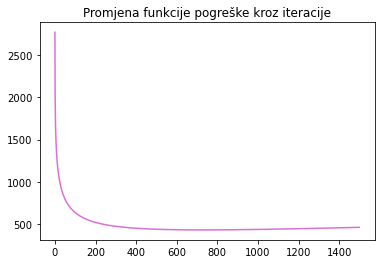

array([[-5.23131814e+00,  5.12811974e+00,  5.19498722e+00,
        -5.09178882e+00],
       [-4.60855246e+00, -1.63791653e+00,  1.55936627e+00,
         4.68710272e+00],
       [ 6.47628296e-02,  7.74200307e-03,  1.79099498e-02,
        -9.04147824e-02],
       [ 6.87075840e-02, -2.28544224e-02, -5.13064439e-02,
         5.45328226e-03],
       [ 9.47486671e-02,  1.28514869e-02, -1.05608455e-01,
        -1.99169921e-03],
       [-5.68294577e-02,  1.25806118e-02,  1.28278791e-02,
         3.14209668e-02],
       [-1.18069369e-02,  1.82054950e-02, -1.05921005e-01,
         9.95224471e-02],
       [-2.95880958e-01, -1.49035928e-01,  2.18015236e-02,
         4.23115362e-01],
       [ 5.15888027e-02,  1.15500599e-01, -8.50156273e-02,
        -8.20737749e-02],
       [ 6.55852588e-01,  3.06311523e-01, -7.85439967e-02,
        -8.83620115e-01],
       [-9.94741591e-02, -1.42476283e-01,  4.66825127e-02,
         1.95267930e-01],
       [-4.79156864e-02, -9.81834832e-02,  7.28260921e-02,
      

In [141]:
# Broj klasa
k = np.unique(y).shape[0]
# Model
model = Softmax(k)
model.fit(X,y,1000,0.001,1500)
print(accuracy_score(y,model.predict_sm(X,y)))
model.plot_cost()
model.theta

In [142]:
data_test = pd.read_csv("./Mobiteli/test.csv")
X_test,y_test = data_test.iloc[:,:-1], data_test.iloc[:,-1].to_numpy()
X_test = scale(X_test)

In [144]:
y_pred = model.predict_sm(X_test,y_test)

print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.93


## Zadatak 4 (35)
Jedan veliki trgovački lanac se susreće s problemom da isti proizvodi budu različito kategorizirani u poslovnicama po svijetu. <br>
Kako bi riješili problem, skupili su podatke o proizvodima tako da su svaki podatak opisali pomoću $93$ različite varijable i ručno označili kojoj klasi pripada. <br>
Vaš cilj je na temelju tih podataka razviti model koji će uspješeno kategorizirati nove proizvode. 

Dana vam je datoteka `products_data_train.csv` i `products_data_test.csv` sa podacima za učenje i podacima za testiranje. <br>
Podaci sadrže prvi stupac - ID, a nakon toga $93$ stupca sa značajkama. <br>
Implementacija je potpuno proizvoljna. <br>

Vaš kod standardno predajte u Python bilježnici. <br>


Osim navedeno, priložena vam je datoteka `products_data_evaluate.csv` koja za razliku od ostalih datoteka ne sadrži stupac sa oznakama klasa. Nakon što ste napravili svoj model pokrenite ga na tom skupu podataka, a dobivene predikcije spremite u `products_data_evaluate_prediction.csv` i priložite rješenju zadaće. <br>

(Na tim predikcijama ćemo računati točnost vašeg modela i napraviti rang-ljestvicu :) )

In [149]:
products_train, products_test = LoadData('./products_data_train.csv', './products_data_test.csv')

x_train = np.array(products_train[:,1:94], dtype=np.float)
y_train = products_train[:,94:]
y_train = y_train.reshape(1,-1)[0]
y_train = np.array([int(k[len(k)-1])-1 for k in y_train])

x_test = np.array(products_test[:,1:94], dtype=np.float)
y_test = products_train[:,94:]
y_test = y_test.reshape(1,-1)[0]
y_test = np.array([int(k[len(k)-1])-1 for k in y_test])

ValueError: operands could not be broadcast together with shapes (2000,4) (48702,4) 